###  A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. 


### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

Ho: There is no significant difference between the 4 different laboratories.

Ha: There is a significant differnece between the 4 different laboratories.(Atleast one Laboratory is different from others)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
from scipy import stats

In [2]:
from statsmodels.formula.api import ols                               #for n-way ANOVA ols - ordinary least squars
from statsmodels.stats.anova import _get_covariance, anova_lm         # For n-way ANOVA
from statsmodels.stats.multicomp import MultiComparison               # When you want to test two groups after

In [3]:
df = pd.read_csv('LabTAT.csv')
df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [4]:
df1 = df.rename({'Laboratory 1': 'Laboratory_1', 'Laboratory 2': 'Laboratory_2', 'Laboratory 3': 'Laboratory_3', 'Laboratory 4': 'Laboratory_4'}, axis=1)

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Laboratory_1,120.0,178.361583,13.173594,138.30,170.3350,178.530,186.5350,216.39
Laboratory_2,120.0,178.902917,14.957114,140.55,168.0250,178.870,189.1125,217.86
Laboratory_3,120.0,199.913250,16.539033,159.69,188.2325,199.805,211.3325,238.70
Laboratory_4,120.0,163.682750,15.085080,124.06,154.0500,164.425,172.8825,205.18


In [6]:
df1.mean()

Laboratory_1    178.361583
Laboratory_2    178.902917
Laboratory_3    199.913250
Laboratory_4    163.682750
dtype: float64

In [7]:
df1.var()

Laboratory_1    173.543568
Laboratory_2    223.715251
Laboratory_3    273.539607
Laboratory_4    227.559632
dtype: float64

In [8]:
df1.std()

Laboratory_1    13.173594
Laboratory_2    14.957114
Laboratory_3    16.539033
Laboratory_4    15.085080
dtype: float64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory_1  120 non-null    float64
 1   Laboratory_2  120 non-null    float64
 2   Laboratory_3  120 non-null    float64
 3   Laboratory_4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


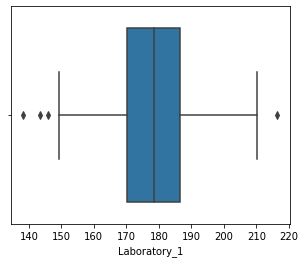

In [10]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df1, x='Laboratory_1')
plt.show()

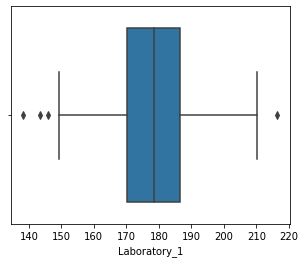

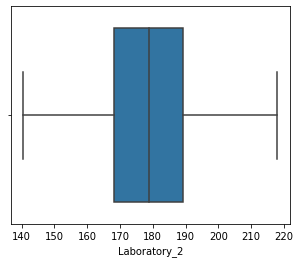

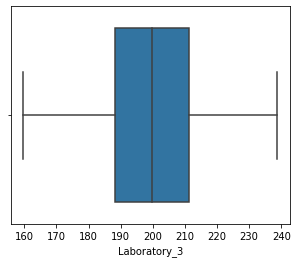

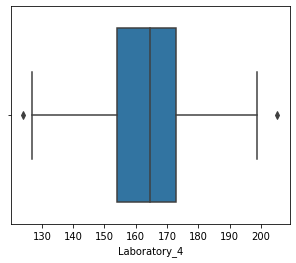

In [11]:
for i in df1.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df1, x=i)
    plt.show()

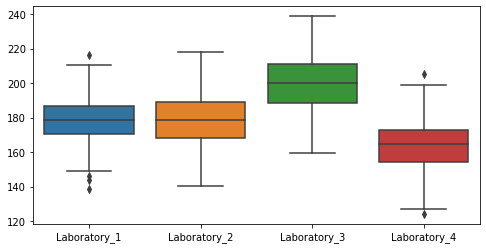

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df1)
plt.show()

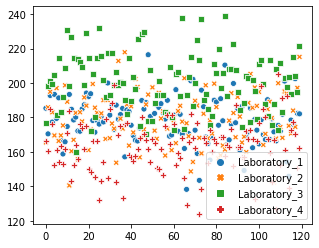

In [13]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df1)
plt.show()

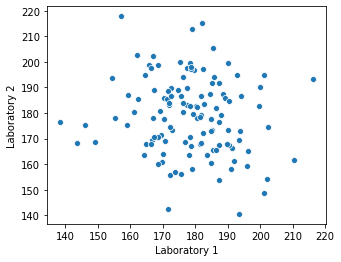

In [14]:
plt.figure(figsize=(5,4))
sns.scatterplot( x='Laboratory 1', y='Laboratory 2', data=df)
plt.show()

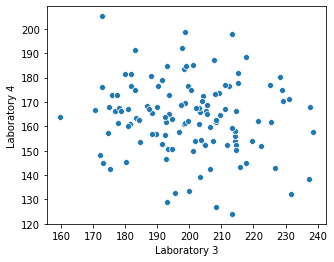

In [15]:
plt.figure(figsize=(5,4))
sns.scatterplot( x='Laboratory 3', y='Laboratory 4', data=df)
plt.show()

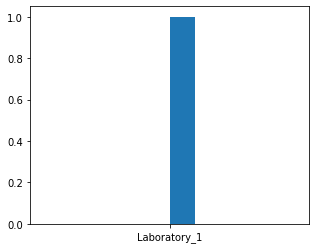

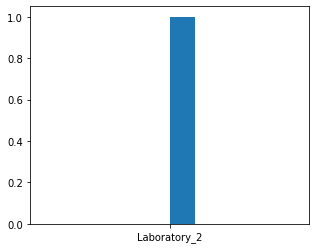

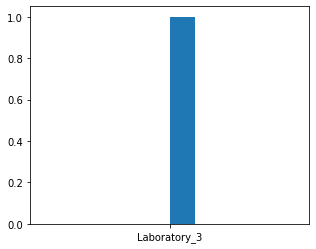

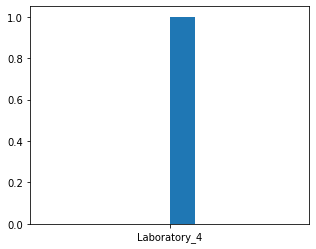

In [16]:
for i in df1.columns:    
    plt.figure(figsize=(5,4))
    plt.hist(x=i, data=df)
    plt.show()

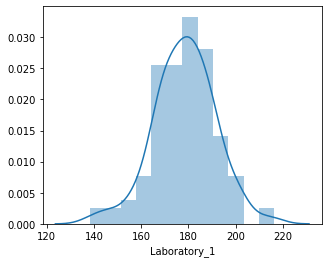

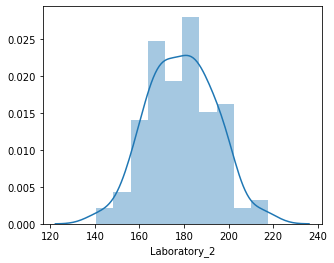

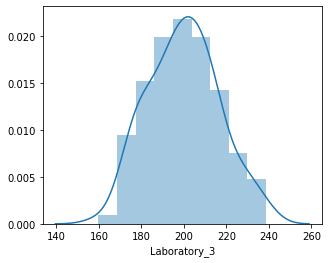

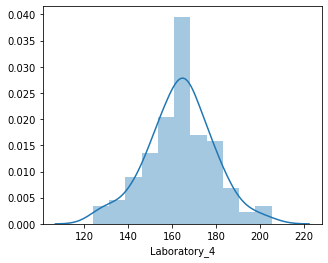

In [17]:
for i in df1.columns:    
    plt.figure(figsize=(5,4))
    sns.distplot(df1[i])
    plt.show()

In [18]:
dframe1 = df1['Laboratory_1']
dframe2 = df1['Laboratory_2']
dframe3 = df1['Laboratory_3']
dframe4 = df1['Laboratory_4']

### Shapiro test

##### Ho: Distribution within a group is Normal.
##### Ha: Data is not Normal

In [19]:
dataframe = [dframe1, dframe2, dframe3, dframe4]
print(stats.shapiro(dframe1))
print(stats.shapiro(dframe2))
print(stats.shapiro(dframe3))
print(stats.shapiro(dframe4))

(0.9901824593544006, 0.5506953597068787)
(0.9936322569847107, 0.8637524843215942)
(0.9886345267295837, 0.4205053448677063)
(0.9913753271102905, 0.6618951559066772)


##### From the results we can say that no pvalue is less than 0.05 which is alpha as per our data
##### So all the Laboratories are normally distrubuted

### Levene Test

##### Ho: There is Homogeneity of variance within a variable.

##### Ha: Violation to the assumption.

In [20]:
print(stats.levene(dframe1,dframe2,dframe3,dframe4))

LeveneResult(statistic=2.599642500418024, pvalue=0.05161343808309816)


In [21]:
stats.f_oneway(dframe1,dframe2,dframe3,dframe4)

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

#### We can see P value is not less than 0.05 so Null stays and that says there is no difference in the average Turn Around Time of 4 laboratories. 